# CS 584 :: Data Mining :: George Mason University :: Fall 2022


# Homework 1: KNN&PCA

- **100 points [9% of your final grade]**
- **Due Friday, September 23 by 11:59pm**

- *Goals of this homework:* (1) implement the KNN algorithm for classifying handwritten digit images; (2) implement the PCA algorithm to reduce the feature dimension so that we can speed up the KNN algorithm and also improve the classification performance; (3) tune the hyperparameters of the KNN and PCA algorithms to produce classification result as good as possible.

- *Submission instructions:* for this homework, you need to submit to two different platforms. First, you should submit your notebook file to **Blackboard** (look for the homework 1 assignment there). Please name your submission **FirstName_Lastname_hw1.ipynb**, so for example, my submission would be something like **Ziwei_Zhu_hw1.ipynb**. Your notebook should be fully executed so that we can see all outputs. Then, you need to output a txt file from this notebook (you will see later in this notebook) and submit it to the HW1 page in the http://miner2.vsnet.gmu.edu website.

## Part 1: KNN (40 points)

In this part, you need to implement your own KNN algorithm for classifying the digits (from 0 to 9) from the handwritten digit images (28 pixel * 28 pixel). The provided train.txt is the training data you will use for building your model. Each line in the file is one sample, whose first value is the ground-truth label and the following 784 values are the pixels of the image. First of all, let's load the data by excuting the following code.

In [48]:
import numpy as np

data = np.loadtxt("train.txt", delimiter=',')
labels = data[:, 0].astype(int)
features = data[:, 1:]

print('array of labels: shape ' + str(np.shape(labels)))
print('array of feature matrix: shape ' + str(np.shape(features)))

array of labels: shape (60000,)
array of feature matrix: shape (60000, 784)


Now, we have the label variable to store the ground-truth labels (from 0 to 9) of all 60,000 samples, and matrix features to store the image pixels of these samples. Next, let's excute the following code to plot the first 4 samples to see how these images look like.

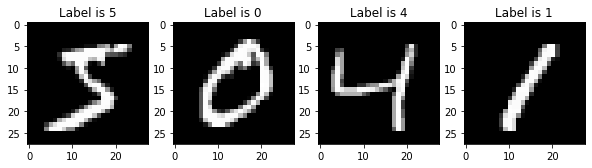

In [53]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 4, figsize=(10, 50))
for i in range(4):  
    ax[i].imshow(features[i].reshape((28, 28)), cmap=plt.get_cmap('gray'))
    ax[i].set_title('Label is %d' % labels[i])

Next, you need to randomly select 20% samples from the data as the **validation set**, and generate the new **training set** by removing the selected validation samples from the original dataset. Write your code in the next cell.

In [56]:
import random

temporary = list(zip(features, labels))
random.shuffle(temporary)
feature, label = zip(*temporary)
label=np.asarray(label)
feature=np.asarray(feature)
div=int(0.8*len(label))                                   #splitting training and testing(validationset) for labels and feature. 
                                                            #20% samples from the data as the validation set and training as 80%
div1=int(0.8*len(feature))
labeltrainingset, labelvalidationset = label[:div],label[div:]
featuretrainingset, featurevalidationset = feature[:div1],feature[div1:]


print(len(labelvalidationset))          #splitting training and testing(validationset) for labels and feature. 
                                          #20% samples from the data as the validation set 
print(len(labeltrainingset))

print(len(featurevalidationset))
print(len(featuretrainingset))




12000
48000
12000
48000


Now, it's time to implement your KNN algorithm. In the next cell, please write your code to predict labels for samples in the validation set by the KNN model built on the training set. Here we set K = 10 and use the Euclidean distance to find neighbors.

**Note: You should implement the algorithm by Python, Numpy, and other libraries you think are necessary. You are NOT allowed to directly call APIs from an exiting Machine Learning library like sklearn.**

**Note: Here, you should only use the labels from the training set for the KNN model.**

In [57]:
import numpy as np
from collections import Counter
 
def bestpredictions(labels):
    occurence_count = Counter(labels)                                    #bestpredictions function returns most frequent element in list
    return occurence_count.most_common(1)[0][0]


def knn(xtra,ytra,xtest,k):                                           #knn function to calculate k nearest neighbours(knn)
    finalli=[]
    for testpoint in xtest:                                                     
        eudistance = []
        for i in range(xtra.shape[0]): 
            distanceofpoints =np.sqrt(np.sum((np.array(xtra[i,:])- testpoint)**2))  #calculating euclidean distance between testpoint and training set 
            eudistance.append(distanceofpoints)                                   #and appending the distance to eudistance list
        eudistance = np.array(eudistance) 
        #print("total list")
        #print(eudistance)
        sortedlist = np.argsort(eudistance)[:k]                          #sorting and returning the indexes which has lowest euclidean distance value
        sortedlistindex=[]
        sortedlistindex=sortedlist.tolist()
        #print("sorted list")
        #print(sortedlistindex)
        finallabel = ytra[sortedlistindex]                          #using the indexes to find therespective labels
        finallabels=[]
        finallabels=finallabel.tolist()
        #print("labels")
        #print(finallabels)                                           #selecting the label which has max repetitions as the nearest prediction label
        finalli.append(bestpredictions(finallabels))                     # storing the nearest label point in finalli list
    return finalli
                                                                         
finallist=[]                                              
finallist=knn(featuretrainingset,labeltrainingset,featurevalidationset,k=10)
print(np.array(finallist))                                                         #printing the nearest neighbours

[2 5 5 ... 3 1 5]


Then, please write code to compute the Accuracy, and Micro-averaged and Macro-averaged F1 scores to evaluate the performance on the validation set and print out these three metrics.

In [67]:
accuracyofm = (finallist == labelvalidationset).sum() / labelvalidationset.shape[0]
print("accuracy")
print (accuracyofm)                                                 #printing accuracy

import numpy as np
def f1(ytru, labepred):
    tp = np.sum(np.multiply([i==True for i in labepred], ytru))                             # building confusion matrix
    tn = np.sum(np.multiply([i==False for i in labepred], [not(j) for j in ytru]))
    fp = np.sum(np.multiply([i==True for i in labepred], [not(j) for j in ytru]))
    fn = np.sum(np.multiply([i==False for i in labepred], ytru))
    preci = tp/(tp+fp)                                                         #this is precision
    rekal = tp/(tp+fn)                                                         #this is recall
    if preci != 0 and rekal != 0:
        f1 = (2*preci*rekal)/(preci + rekal)
    else:
        f1 = 0
    return f1

def f1macro(ytru, ypred):
    macro = []                                        #this function is used to calculate f1 macro fpr test set and generated predictions
    for points in np.unique(ytru):
        motru = [points==spoints for spoints in ytru]
        mopred = [points==spoints for spoints in ypred]
        score = f1(motru, mopred)
        macro.append(score)
    return np.mean(macro)
def f1micro(ytru,ypred):
    tp = np.sum(np.multiply([i==True for i in ypred], ytru))
    tn = np.sum(np.multiply([i==False for i in ypred], [not(j) for j in ytru]))          #this function is to calculate f1micro
    fp = np.sum(np.multiply([i==True for i in ypred], [not(j) for j in ytru]))
    fn = np.sum(np.multiply([i==False for i in ypred], ytru))
    resu=tp/(tp+((1/2)*(fp+fn)))
    return resu

print("f1macro")
print(f1macro(labelvalidationset,finallist))
print("f1micro")                                           #printing f1macro f1micro for labelvalidation and the generated predictions
print(f1micro(labelvalidationset,finallist))

accuracy
0.9705
f1macro
0.9702944700199824
f1micro
0.9846590909090909


## Part 2: PCA (30 points)

In this part, you will implement the PCA algorithm to reduce the input dimension for the handwritten digit recognition task. In the next cell, please write your code to compute the transformation matrix in the PCA method for the training set we got from the previous part. Here, we only keep the **top 50 dimensions**.

**Hint: You can use the function from the Numpy library np.linalg.svd() to compute SVD.**

**Note: You should only use the training set to compute PCA without using validation set.**

In [66]:
# Write your code here
def pca(featuretrains,k):
    featuretrain=featuretrains                                                          # here k is top 50 dimensions
    featuretrain = featuretrain - featuretrain.mean(axis=0)               # Centering the data points to get centered Matrix
    cov = np.cov(featuretrain.T) / featuretrain.shape[0]                 # building covariance matrix
    vec, wa = np.linalg.eig(cov)
    indx = vec.argsort()[::-1]                             # Sorting in descending order and getting the indices
    vec = vec[indx]                                       # Using  indices on eigen vectors
    wa = wa[:,indx] 

    finalarr=featuretrain.dot(wa[:, :k])                    #storing them in finalarr
    finalarr=np.negative(finalarr)
    return finalarr
pcaarr=pca(featuretrainingset,k=10)
print("reduced pca ")
print(pcaarr)                                                           #printing the reduced pca

reduced pca 
[[ -70.09467809-0.j  448.80463501-0.j  393.54770028-0.j ...
   189.72102305-0.j  215.81250249-0.j -595.15655932-0.j]
 [   2.69770998-0.j  644.40014295-0.j   19.04981109-0.j ...
   170.4598564 -0.j  717.81283999-0.j -346.49562858-0.j]
 [-654.72043623-0.j  138.31571968-0.j 1034.62976462-0.j ...
  -329.44611072-0.j -454.25060499-0.j -643.35798548-0.j]
 ...
 [ 297.48312277-0.j -569.99211593-0.j  387.10251256-0.j ...
   148.39331453-0.j  189.77161867-0.j   98.18671107-0.j]
 [  25.89678612-0.j  344.75054656-0.j -722.06301952-0.j ...
    18.2349275 -0.j  657.04657507-0.j  344.0922719 -0.j]
 [-363.53019704-0.j  173.42445546-0.j  299.54032661-0.j ...
   193.47782446-0.j  445.73954665-0.j -290.72085602-0.j]]


Now, you need to apply the computed transformation matrix to reduce the dimension for the training set and the validation set. Then, build a new KNN model on the dimension-reduced traning data and predict the labels for the dimension-reduced validation set. Report the Accuracy, and Micro-averaged and Macro-averaged F1 scores.

In [ ]:
# Write your code here
featrainpca=pca(featuretrainingset,k=10)
feavalipca=pca(featurevalidationset,k=10)
updatedpredictions=knn(featrainpca,labeltrainingset,feavalipca,k=10)
accuracy = (updatedpredictions == labelvalidationset).sum() / labelvalidationset.shape[0]
print (accuracy) 
print("f1macro")
print(f1macro(labelvalidationset,updatedpredictions))
print("f1micro")                                           #printing f1macro f1micro for labelvalidation and the updated predictions
print(f1micro(labelvalidationset,updatedpredictions))


## Part 3: Tune Hyperparameter [Need to submit to Miner2] (30 points)

In this part, you need to do your best to tune the hyperparameter in KNN and PCA to build the best model and submit the predictions for the testing data to Miner2 system. First of all, let's load the testing data by excuting the following code.

In [ ]:
test_features = np.loadtxt("test.txt", delimiter=',')
print('array of testing feature matrix: shape ' + str(np.shape(test_features)))

# writing the logic for hyperparmeter tuning in this block
bestpredictionsfin=finallist
bestacc=accuracyofm
valofk=10
for i in range(10):
    knnpred=knn(featuretrainingset,labeltrainingset,featurevalidationset,i)
    accuracyofknn = (knnpred == labelvalidationset).sum() / labelvalidationset.shape[0]
    if(accuracyofknn>bestacc):
        bestacc=accuracyofknn
        bestpredictionsfin=knnpred
        valofk=i
for j in range(0,100,10) :
    featrpc=pca(featuretrainingset,j)
    featepc=pca(featurevalidationset,j)
    knnpred=knn(featrpc,labeltrainingset,featepc,valofk)
    accuracyofknn = (knnpred == labelvalidationset).sum() / labelvalidationset.shape[0]
    if(accuracyofknn>bestacc):
        bestacc=accuracyofknn
        bestpredictionsfin=knnpred
        

Now, you should tune three hyperparameters:

- the number of nearest neighbors in KNN 
- the distance measurement (choose from Euclidean distance, L1 norm distance, and cosine distance)
- the number of dimensions kept in PCA 

Rules:

- Write your predictions for samples in the testing set into a file, in which each line has one integer indicating the prediction from your best model for the corresponding sample in the test.txt file. Please see the format.txt file in Miner2 as one submission example. Name the submission file hw1_Miner2.txt and submit it to Miner2 HW1 page.
- The public leaderboard shows results for 50% of randomly chosen test instances only. This is a standard practice in data mining challenge to avoid gaming of the system. The private leaderboard will be released after the deadline evaluates all the entries in the test set.
- You are allowed 5 submissions in a 24 hour cycle. 
- The final score and ranking will always be based on the last submission.
- Grading will only be based on the model performance (based on Accuracy metric) instead of ranking. You'll get full credit as long as your socre is a reasonable number.


**Hint: You can tune these hyperparameters by one randomly generated validation set (like what you have done in previous parts), or you can also use the cross-validation method.**

In [68]:
# Write your code here
with open("hw1_Miner2.txt", "w") as file:
    p = [str(pred)+"\n" for pred in finallist]
    file.writelines(p)

### Question: What is your final hyperparameter setting? How do you tune them? What choices have you tried?

#### Write your answer here

In [ ]:
number of dimensions 50
k=10
metric=euclid

### Question: your username in Miner2 and the score&ranking of your submission in Miner2 (at the time of answering this question)

#### Write your answer here

In [ ]:
 Dataset large to perform analysis in real time and taking several hours to get the output